# Training networks using framework from `ico_parser.py`

## Objective

## Steps

## 1. File with information about ICO

In [1]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta

In [2]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=';')

In [3]:
df_info.head()

ico                                      adress  fraud  start_date  \
0          0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  08/11/2017   
1        AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  18/12/2017   
2  AMPLEFORTH  0xd46ba6d942050d489dbd938a2c909a5d5039a161      0  14/06/2019   
3        ANKR  0x8290333cef9e6d528dd5618fb97a76f268f3edd4      0  21/02/2019   
4      BANCOR  0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c      0  06/10/2017   

  market_start_date  diff_days  market_days size_ok price_zero  Market Cap  \
0        15/08/2017          4         1140     NaN        NaN        45.0   
1        21/12/2017          3         1012     NaN        NaN       154.0   
2        27/06/2019         13          459     NaN        NaN        47.0   
3        03/05/2019         12          573     NaN        NaN       170.0   
4        06/12/2017          2         1204     NaN        NaN        61.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    02/11/2018  NaN  NaN   
1        x              13        10         0    19/06/2018  NaN  NaN   
2        x               3         4        20    24/12/2019  NaN  NaN   
3        x              11         7        41    09/01/2019  NaN  NaN   
4        x               2        11         7    12/09/2017  NaN  NaN   

  social_media  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

## 3. Load data from pickle

In [4]:
import pickle

In [5]:
with open('ico_arrays_2020-10-12.pickle', 'rb') as handle:
    dict_array_pickle = pickle.load(handle)

In [6]:
dict_array_pickle.keys()

dict_keys(['0X', '0XCERT', '4NEW', 'ABULABA', 'AELF', 'AERGO', 'AIDCOIN', 'AIRSWAP', 'AKROPOLIS', 'ALLME', 'AMPLEFORTH', 'ANATOMIA', 'ANKR', 'ARBITRAGE', 'ARCBLOCK', 'ARPA', 'ATLAS', 'BANCOR', 'BAND', 'BANKERA', 'BANKEX', 'BELANCE', 'BEZANT', 'BILLIONAIRE', 'BIOGRAFFI', 'BITAIR', 'BITCOINCROWN', 'BITCOINMAX', 'BITCOINRED', 'BITDEAL', 'BITDEPOSITARY', 'BITFINEX', 'BLISSEXCHANGE', 'BLOCKCAT', 'BLOCKMESH', 'BLUZELLE', 'BREAD', 'BUDBO', 'CAPPASITY', 'CARNOMIC', 'CARTESI', 'CCECOIN', 'CELER', 'CELSIUS', 'CHAINLINK', 'CHANGENOW', 'CINDICATOR', 'CIVIC', 'CNNS', 'COCOS', 'COFOUND', 'COMPOUND', 'CONTENTOS', 'COTI', 'CREDITS', 'CRYPTERIUM', 'CRYPTO20', 'CRYPTOCOM', 'CRYPTONIAPOKER', 'CRYPTONITY', 'CRYPTORYIA', 'CYBERMOVIECHAIN', 'DAPSCOIN', 'DECENTRALAND', 'DECENTRALIZEDID', 'DECENTURION', 'DIAM', 'DIGITEXFUTURES', 'DMARKET', 'DROPIL', 'DUSKNET', 'DWS', 'EGRETIA', 'EMPOWR', 'ENIGMA', 'ENVION', 'ETHEERA', 'ETHEREUMCASHPRO', 'ETHEREUMDARK', 'ETHERNETCASH', 'EXIMCHAIN', 'FACEBLOCK', 'FANTOM', 'FETC

## 4. Filter data for size equals to 60

In [7]:
dict_perc_new_holders_60 = {k:v[1] for k,v in dict_array_pickle.items() if len(v[1]) == 60}
dict_gas_ratio = {k:v[4] for k,v in dict_array_pickle.items() if len(v[4]) == 60}

In [8]:
df_new_holders_60 = pd.DataFrame(dict_perc_new_holders_60).T
df_gasratio_60 = pd.DataFrame(dict_gas_ratio).T

In [9]:
print(df_new_holders_60.shape)
print(df_gasratio_60.shape)

(185, 60)
(224, 60)


## 5. Plotting the dataset

In [10]:
import plotly.express as px

In [11]:
df_info.head()

ico                                      adress  fraud  start_date  \
0          0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  08/11/2017   
1        AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  18/12/2017   
2  AMPLEFORTH  0xd46ba6d942050d489dbd938a2c909a5d5039a161      0  14/06/2019   
3        ANKR  0x8290333cef9e6d528dd5618fb97a76f268f3edd4      0  21/02/2019   
4      BANCOR  0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c      0  06/10/2017   

  market_start_date  diff_days  market_days size_ok price_zero  Market Cap  \
0        15/08/2017          4         1140     NaN        NaN        45.0   
1        21/12/2017          3         1012     NaN        NaN       154.0   
2        27/06/2019         13          459     NaN        NaN        47.0   
3        03/05/2019         12          573     NaN        NaN       170.0   
4        06/12/2017          2         1204     NaN        NaN        61.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    02/11/2018  NaN  NaN   
1        x              13        10         0    19/06/2018  NaN  NaN   
2        x               3         4        20    24/12/2019  NaN  NaN   
3        x              11         7        41    09/01/2019  NaN  NaN   
4        x               2        11         7    12/09/2017  NaN  NaN   

  social_media  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [12]:
df_series_stack = pd.DataFrame(df_new_holders_60.iloc[:, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [13]:
df_series_stack.head()

level_0  days    series
0      0X     0  0.638636
1      0X     1  0.643263
2      0X     2  0.648842
3      0X     3  0.652478
4      0X     4  0.656504

In [14]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

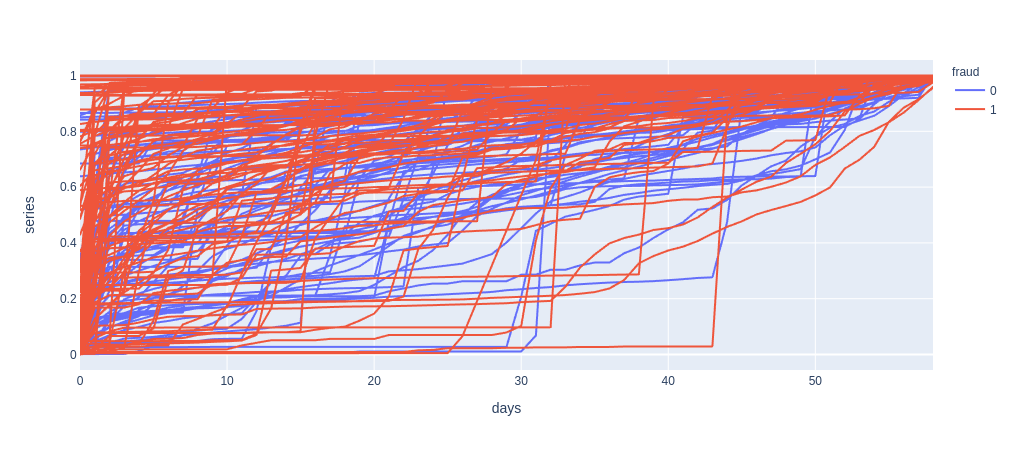

In [15]:


df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

In [16]:
df_series_stack = pd.DataFrame(df_gasratio_60.iloc[:20, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [17]:
df_series_stack.head()

level_0  days    series
0      0X     0  0.244923
1      0X     1  0.237769
2      0X     2  0.268525
3      0X     3  0.273316
4      0X     4  0.285068

In [18]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

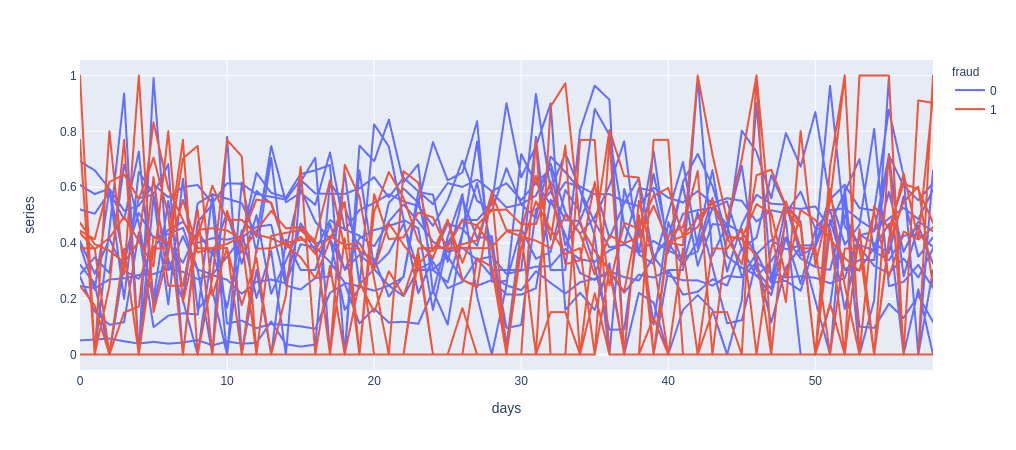

In [19]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

## 6. Dataset for training

In [20]:
df_training_new_holders = df_new_holders_60.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_new_holders.set_index('ico', inplace=True)

In [21]:
df_training_new_holders.head()

0         1         2         3         4         5         6  \
ico                                                                             
0X       0.638636  0.643263  0.648842  0.652478  0.656504  0.662814  0.667782   
0XCERT   0.755084  0.783564  0.803355  0.854100  0.866349  0.935377  0.983407   
ABULABA  0.763140  0.883566  0.886228  0.889554  0.894877  0.896873  0.898869   
AELF     0.004278  0.036816  0.041683  0.045961  0.051299  0.055970  0.062485   
AERGO    0.021361  0.088260  0.140255  0.486670  0.529392  0.543633  0.551085   

                7         8         9  ...        51        52        53  \
ico                                    ...                                 
0X       0.674863  0.679190  0.686451  ...  0.970634  0.976453  0.981461   
0XCERT   0.990466  0.990768  0.991130  ...  0.998914  0.999035  0.999155   
ABULABA  0.900200  0.900865  0.906188  ...  0.988024  0.988024  0.988024   
AELF     0.068804  0.074064  0.078617  ...  0.966716  0.972329  0.977314   
AERGO    0.555224  0.561020  0.564994  ...  0.991058  0.992052  0.993873   

               54        55        56        57        58   59  fraud  
ico                                                                    
0X       0.985107  0.989293  0.992759  0.995894  0.997326  1.0      0  
0XCERT   0.999216  0.999698  0.999759  0.999759  0.999879  1.0      1  
ABULABA  0.988689  0.990020  0.992016  0.994677  0.998004  1.0      1  
AELF     0.981199  0.983947  0.987008  0.994034  0.996782  1.0      0  
AERGO    0.995363  0.996854  0.997682  0.998013  0.999006  1.0      0  

[5 rows x 61 columns]

In [22]:
df_training_gasratio = df_gasratio_60.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_gasratio.set_index('ico', inplace=True)

## Importing `ICODeepTraining`

In [23]:
from ico_parser import ICODeepTraining

### 7.1 Define the model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [25]:
model_mlp = Sequential()
model_mlp.add(Dense(60, input_dim=60, activation='relu'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(10, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

In [26]:
ico_training = ICODeepTraining(df_training_gasratio.iloc[:, :-1],
                               df_training_gasratio.iloc[:, -1],
                               model_mlp,
                               ann_type='mlp',
                               size_array=60)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 6,331
Trainable params: 6,331
Non-trainable params: 0
_________________________________________________________________


In [27]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=32)

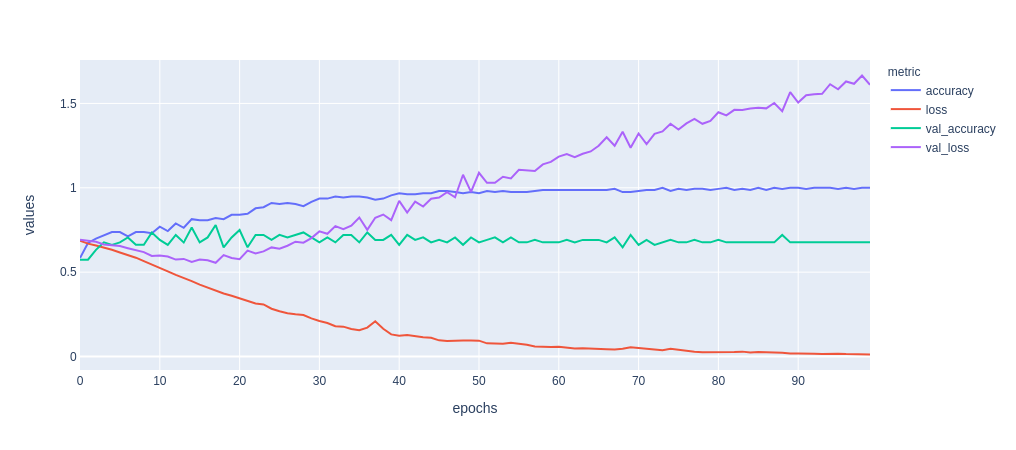

In [30]:
ico_training.plot_training()

## CNN
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(60, 1)))
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(224, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
ico_training = ICODeepTraining(df_training_gasratio.iloc[:, :-1],
                               df_training_gasratio.iloc[:, -1],
                               model_cnn,
                               ann_type='cnn',
                               size_array=60)
                               
ico_training.split_train_test()
ico_training.model_summary()

In [ ]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=[Recall()] ,
                      epochs=50,
                      verbose=0, 
                      batch_size=32)
ico_training.plot_training()

### LSTM
Based on the following articles:
1. https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
2. https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e
3. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [ ]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

### Using the framework for LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(60, 1), return_sequences=True))
model_lstm.add(Dense(60, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

In [ ]:
ico_training = ICODeepTraining(df_training_gasratio.iloc[:, :-1],
                               df_training_gasratio.iloc[:, -1],
                               model_lstm,
                               ann_type='lstm',
                               size_array=60)
                               
ico_training.split_train_test()
ico_training.model_summary()

In [ ]:
ico_training.train_network(loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],#, Recall()],
        epochs=30,
        verbose=0,
        batch_size=32)
ico_training.plot_training()